This jupyter notebook will help us in creating graphs and charts for our results. It will have basic functionality to calculate speedup and efficiency

In [2]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

In [3]:
# loop through a list of threaded results and compare to sequential execution to find a df of threads, avg, sppedup, and efficiency
def calc_speedup(seq_list, thread_lists):
  seq_list.remove(max(seq_list))
  seq_list.remove(min(seq_list))
  seqAvg = np.average(seq_list)
  print('Sequential Execution time average: ', seqAvg)

  num_of_threads = 0
  results = []
  result_names = ['Threads', 'STD', 'Avg', 'Speedup', 'Efficiency']

  for thread_list in thread_lists:
    # Remove max and min for current list
    thread_list.remove(max(thread_list))
    thread_list.remove(min(thread_list))

    num_of_threads += 1
    thread_avg = round(np.average(thread_list), 3)
    speedup = round(seqAvg/thread_avg, 3)
    efficiency = round(speedup/num_of_threads, 3)
    standard_dev = round(np.std(thread_list), 5)
    results.append([num_of_threads, standard_dev, thread_avg, speedup, efficiency])

  df = pandas.DataFrame(results, columns=result_names)  
  return df

In [4]:
# Will take a dataframe with Avg, Speedup, and Efficiency and plot them
def plot_speedup(df):
  ax = plt.gca() 
  df.plot(kind = 'line', x = 'Threads', y = 'Avg', color = 'green', ax = ax)
  df.plot(kind = 'line',x = 'Threads', y = 'Speedup', color = 'blue', ax = ax)
  df.plot(kind = 'line',x = 'Threads', y = 'Efficiency', color = 'orange', ax = ax)
  plt.show();

In [5]:
# Will take a list of sequential results and return the average of the list
def avg(seq_list):
  seq_list.remove(max(seq_list))
  seq_list.remove(min(seq_list))
  seqAvg = np.average(seq_list)
  return seqAvg

In [6]:
seq_50_I = [0.002076, 0.000901, 0.001030, 0.000911, 0.000918, 0.000917, 0.000913]
seq_100_I = [0.001745, 0.002070, 0.001904, 0.001629, 0.001738, 0.001602, 0.001642]
seq_500_I = [0.007565, 0.008103, 0.009661, 0.007396, 0.006616, 0.007606, 0.007011]
seq_1000_I = [0.014518, 0.013678, 0.014778, 0.014314, 0.014415, 0.014477, 0.009118]

In [7]:
# print the averages of the sequential execution times
print('50 Iterations:', avg(seq_50_I))
print('100 Iterations:', avg(seq_100_I))
print('500 Iterations:', avg(seq_500_I))
print('1000 Iterations:', avg(seq_1000_I))

50 Iterations: 0.0009377999999999999
100 Iterations: 0.0017316000000000002
500 Iterations: 0.007536200000000002
1000 Iterations: 0.014280400000000002


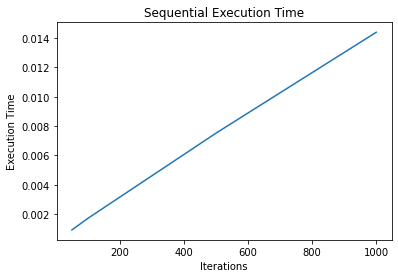

In [8]:
# plot the averages of the sequential execution times
seq_50_I_avg = avg(seq_50_I)
seq_100_I_avg = avg(seq_100_I)
seq_500_I_avg = avg(seq_500_I)
seq_1000_I_avg = avg(seq_1000_I)

seq_avg = [seq_50_I_avg, seq_100_I_avg, seq_500_I_avg, seq_1000_I_avg]
seq_iterations = [50, 100, 500, 1000]

plt.plot(seq_iterations, seq_avg)
plt.xlabel('Iterations')
plt.ylabel('Execution Time')
plt.title('Sequential Execution Time')
plt.show()


In [ ]:
df = calc_speedup(Seq_list, thread_lists)
df

In [25]:
seq = [0.543922, 0.539904, 0.542206, 0.540505, 0.542758, 0.549568, 0.540145]
med_seq = [9.475834, 9.463406, 9.556603, 9.353236, 9.466067, 9.390663, 9.415068]
large_seq = [60.906942, 65.791226, 61.495260, 65.909135, 66.292854, 60.697092, 66.009603]

avg(seq), avg(med_seq), avg(large_seq)

(0.5419072, 9.4422076, 64.0224332)

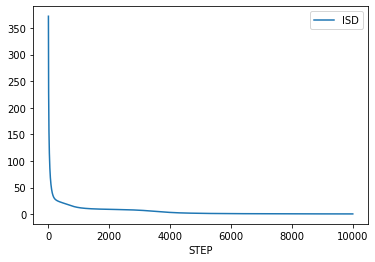

In [13]:
# read in ISD.txt file and plot the data
isd = pandas.read_csv('ISD.txt', sep = '\t')
isd.columns = ['STEP', 'ISD']
isd.plot(x = 'STEP', y = 'ISD')
plt.show()


In [16]:
# small ds results for nmfOpt - no blocking
seq = [0.534458, 0.539122, 0.537426, 0.535542, 0.532333, 0.543207, 0.542756]
avg(seq)

0.5378608

In [17]:
# medium ds results for nmfOpt - no blocking
seq = [9.441730, 9.391151, 9.424263, 9.313599, 9.268967, 9.493464, 9.293930]
avg(seq)

9.372934599999999

In [18]:
# large ds results for nmfOpt - no blocking
seq = [60.663204, 60.128183, 63.347251, 60.117393, 60.801112, 60.199751, 60.442872]
avg(seq)

60.4470244

0.5419072 0.552068 0.5425760000000001 0.5380942 0.5385568 0.5399655999999999 0.5474943999999999 0.5349756000000001 0.5357484 0.5321187999999999 0.5412319999999999


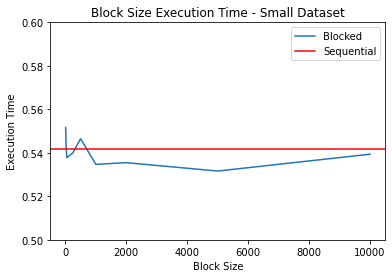

In [29]:
# small ds results for nmfOpt - blocking
seq = [0.543922, 0.539904, 0.542206, 0.540505, 0.542758, 0.549568, 0.540145]
par10 = [0.550422, 0.550338, 0.547757, 0.556342, 0.548995, 0.558231, 0.554243]
par25 = [0.539496, 0.547106, 0.546138, 0.540328, 0.544313, 0.535382, 0.542605]
par50 = [0.541280, 0.538336, 0.536130, 0.545493, 0.538739, 0.535981, 0.535986]
par100 = [0.546231, 0.530213, 0.543186, 0.534009, 0.534886, 0.543913, 0.536790]
par250 = [0.554449, 0.536993, 0.531711, 0.539495, 0.533229, 0.543633, 0.546478]
par500 = [0.540102, 0.532589, 0.537161, 0.541972, 0.567119, 0.560839, 0.557398]
par1000 = [0.534457, 0.535191, 0.532827, 0.537962, 0.534441, 0.539641, 0.531159]
par2000 = [0.536564, 0.539811, 0.534647, 0.537961, 0.533593, 0.534342, 0.535228]
par5000 = [0.530662, 0.535121, 0.535085, 0.530814, 0.531821, 0.529611, 0.532212]
par10000 = [0.537150, 0.534218, 0.536364, 0.533799, 0.544581, 0.553847, 0.563479]

# take average of each list
print(avg(seq), avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000))

# plot the results against the number of block sizes
par = [avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000)]
block_sizes = [10, 25, 50, 100, 250, 500, 1000, 2000, 5000, 10000]


# add a constant line with the sequential execution time to the plot
plt.ylim(.5, .6)
plt.plot(block_sizes, par)
plt.axhline(y = avg(seq), color = 'r', linestyle = '-')
plt.xlabel('Block Size')
plt.ylabel('Execution Time')
plt.title('Block Size Execution Time - Small Dataset')

# and add a legend to the plot to show the sequential line vs the parallel line
plt.legend(['Blocked', 'Sequential'])
plt.show()



9.4422076 9.540960799999999 9.378895600000002 9.391796 9.3637678 9.3725704 9.347297000000001 9.438360800000002 9.458645 9.3526032 9.450391


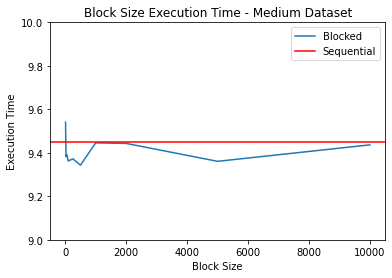

In [30]:
# medium ds results for nmfOpt - blocking
seq = [9.475834, 9.463406, 9.556603, 9.353236, 9.466067, 9.390663, 9.415068]
par10 = [9.450070, 9.591811, 9.599302, 9.527902, 12.228987, 9.482738, 9.503051]
par25 = [9.486993, 9.320670, 9.428383, 9.419038, 9.318298, 9.408089, 9.269470]
par50 = [9.433731, 9.561377, 9.322494, 9.361047, 9.436499, 9.348331, 9.379372]
par100 = [9.460760, 9.281239, 9.436277, 9.313866, 9.336958, 9.437411, 9.294327]
par250 = [9.353697, 9.593345, 9.336391, 9.409245, 9.358116, 9.311966, 9.405403]
par500 = [9.436719, 9.219187, 9.301371, 9.387757, 9.340876, 9.539863, 9.269762]
par1000 = [9.380692, 9.473661, 9.434264, 9.338804, 9.456218, 9.621502, 9.446969]
par2000 = [9.584038, 9.379365, 9.608558, 9.449350, 9.333862, 9.474474, 9.405998]
par5000 = [9.396626, 9.283757, 9.275909, 9.497640, 9.343070, 9.375007, 9.364556]
par10000 = [9.300772, 9.455358, 9.615612, 9.444692, 9.546060, 9.396048, 9.409797]

# take average of each list
print(avg(seq), avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000))

# plot the results against the number of block sizes
par = [avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000)]
block_sizes = [10, 25, 50, 100, 250, 500, 1000, 2000, 5000, 10000]

# set y axis to start at 0 and end at 1
plt.ylim(9, 10)
plt.plot(block_sizes, par)
plt.axhline(y = avg(seq), color = 'r', linestyle = '-')
plt.xlabel('Block Size')
plt.ylabel('Execution Time')
plt.title('Block Size Execution Time - Medium Dataset')

# and add a legend to the plot to show the sequential line vs the parallel line
plt.legend(['Blocked', 'Sequential'])
plt.show()

64.0224332 60.8154756 62.229225 60.5727032 60.540280800000005 60.517412 60.9396588 61.2019142 62.127784000000005 60.779240400000006 60.6673186


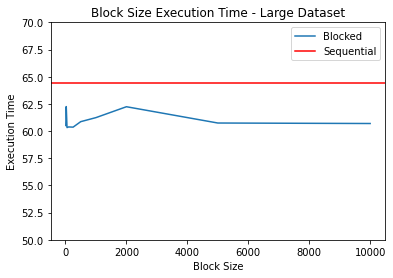

In [32]:
# large ds results for nmfOpt - blocking
seq = [60.906942, 65.791226, 61.495260, 65.909135, 66.292854, 60.697092, 66.009603]
par10 = [60.343254, 60.561474, 60.449829, 62.190076, 60.301975, 60.532745, 62.227841]
par25 = [63.361837, 65.885473, 60.655988, 60.592889, 63.790693, 60.580615, 62.744718]
par50 = [64.132692, 60.386337, 60.141502, 60.161332, 60.417069, 60.083275, 61.757276]
par100 = [60.318428, 60.414053, 60.171394, 61.296319, 61.851624, 60.264112, 60.408492]
par250 = [60.179979, 59.891246, 60.391118, 60.378669, 61.319627, 60.317667, 62.100910]
par500 = [60.314595, 61.117702, 61.756292, 60.340996, 63.036884, 61.125936, 60.357368]
par1000 = [61.227422, 60.354767, 60.306954, 62.765614, 61.834360, 60.654657, 61.938365]
par2000 = [60.613229, 63.260377, 63.451489, 60.436812, 64.865226, 62.845308, 60.468517]
par5000 = [60.095884, 60.554738, 65.304430, 61.575913, 60.762393, 59.960676, 60.907274]
par10000 = [61.029667, 62.605819, 60.816393, 60.217176, 60.193416, 60.315100, 60.958257]

# take average of each list
print(avg(seq), avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000))

# plot the results against the number of block sizes
par = [avg(par10), avg(par25), avg(par50), avg(par100), avg(par250), avg(par500), avg(par1000), avg(par2000), avg(par5000), avg(par10000)]
block_sizes = [10, 25, 50, 100, 250, 500, 1000, 2000, 5000, 10000]

# set y axis to start at 0 and end at 1
plt.ylim(50, 70)
plt.plot(block_sizes, par)
plt.axhline(y = avg(seq), color = 'r', linestyle = '-')
plt.xlabel('Block Size')
plt.ylabel('Execution Time')
plt.title('Block Size Execution Time - Large Dataset')

# and add a legend to the plot to show the sequential line vs the parallel line
plt.legend(['Blocked', 'Sequential'])
plt.show()

In [12]:
from prettytable import PrettyTable

# # Block size tests - really see no joy at all. Too small? Not a localization issue?
# (base) denver:~/CS575/NMF$ ./test.sh 1 10000 ./test_data/med_data.dat 5 0 1 nmf
# 1 threads for nmf -N 6 -I 10000 -T 5 -B 1 ./test_data/med_data.dat
# 9.406589, 9.325238, 9.404208, 9.387634, 9.362653, 9.383552, 9.479898,

# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 10 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 10 ./test_data/med_data.dat
# 9.722706, 9.579972, 9.661539, 9.737212, 9.599060, 9.676715, 9.564941,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 25 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 25 ./test_data/med_data.dat
# 9.432991, 9.493594, 9.463730, 9.553460, 9.448938, 9.493673, 9.498362,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 50 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 50 ./test_data/med_data.dat
# 9.466799, 9.534266, 9.450707, 9.495390, 9.564350, 9.529818, 9.465759,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 100 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 100 ./test_data/med_data.dat
# 9.452977, 9.510970, 9.526947, 9.405941, 9.471033, 9.410863, 9.707120,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 250 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 250 ./test_data/med_data.dat
# 9.408955, 9.560139, 9.436111, 9.338082, 9.544690, 9.416759, 9.575007,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 500 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 500 ./test_data/med_data.dat
# 9.504865, 9.649893, 9.623651, 9.458090, 9.513319, 9.504950, 9.535742,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 1000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 1000 ./test_data/med_data.dat
# 9.483290, 9.528004, 9.468683, 9.524097, 9.507855, 9.453468, 9.463101,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 2000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 2000 ./test_data/med_data.dat
# 9.462383, 9.553690, 9.712771, 9.667013, 9.557601, 9.412043, 9.534750,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 5000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 5000 ./test_data/med_data.dat
# 9.571613, 9.479653, 9.566766, 9.650081, 9.536227, 9.569641, 9.490401,
# (base) denver:~/CS575/NMF$ ./test.sh 6 10000 ./test_data/med_data.dat 5 0 10000 nmfOpt
# 1 threads for nmfOpt -N 6 -I 10000 -T 5 -B 10000 ./test_data/med_data.dat
# 9.470639, 9.565643, 9.551589, 9.517079, 9.560104, 9.457342, 9.522353,

# create arrays of the data
seq = [9.406589, 9.325238, 9.404208, 9.387634, 9.362653, 9.383552, 9.479898]
par_10 = [9.722706, 9.579972, 9.661539, 9.737212, 9.599060, 9.676715, 9.564941]
par_25 = [9.432991, 9.493594, 9.463730, 9.553460, 9.448938, 9.493673, 9.498362]
par_50 = [9.466799, 9.534266, 9.450707, 9.495390, 9.564350, 9.529818, 9.465759]
par_100 = [9.452977, 9.510970, 9.526947, 9.405941, 9.471033, 9.410863, 9.707120]
par_250 = [9.408955, 9.560139, 9.436111, 9.338082, 9.544690, 9.416759, 9.575007]
par_500 = [9.504865, 9.649893, 9.623651, 9.458090, 9.513319, 9.504950, 9.535742]
par_1000 = [9.483290, 9.528004, 9.468683, 9.524097, 9.507855, 9.453468, 9.463101]
par_2000 = [9.462383, 9.553690, 9.712771, 9.667013, 9.557601, 9.412043, 9.534750]
par_5000 = [9.571613, 9.479653, 9.566766, 9.650081, 9.536227, 9.569641, 9.490401]
par_10000 = [9.470639, 9.565643, 9.551589, 9.517079, 9.560104, 9.457342, 9.522353]

# find the average of each array using the avg method
seq_avg = avg(seq)
par_10_avg = avg(par_10)
par_25_avg = avg(par_25)
par_50_avg = avg(par_50)
par_100_avg = avg(par_100)
par_250_avg = avg(par_250)
par_500_avg = avg(par_500)
par_1000_avg = avg(par_1000)
par_2000_avg = avg(par_2000)
par_5000_avg = avg(par_5000)
par_10000_avg = avg(par_10000)

# create a table for the data with 4 decimal places of precision
table = PrettyTable(['Sequential', '10', '25', '50', '100', '250', '500', '1000', '2000', '5000', '10000'])
table.add_row([round(seq_avg, 4), round(par_10_avg, 4), round(par_25_avg, 4), round(par_50_avg, 4), round(par_100_avg, 4), round(par_250_avg, 4), round(par_500_avg, 4), round(par_1000_avg, 4), round(par_2000_avg, 4), round(par_5000_avg, 4), round(par_10000_avg, 4)])

# print the table
table


Sequential,10,25,50,100,250,500,1000,2000,5000,10000
9.3889,9.648,9.4797,9.4984,9.4746,9.4733,9.5365,9.4894,9.5551,9.5469,9.5244


Python small average:  0.4910113334655762
Python medium average:  3.535957956314087
Python large average:  16.716882371902464


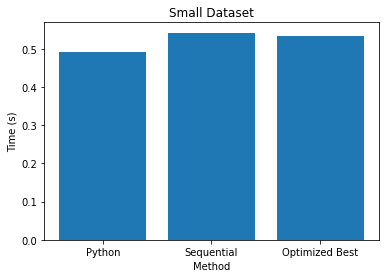

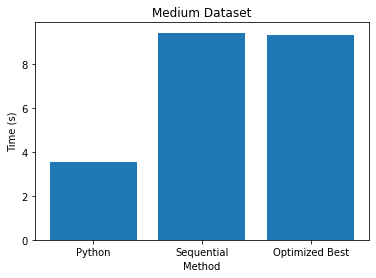

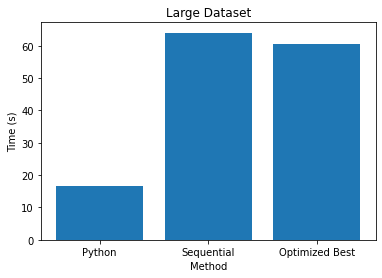

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (9,).

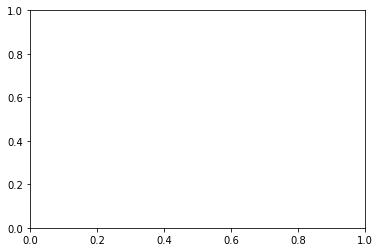

In [44]:
# running python results for the small dataset
py_small = [0.5197911262512207, 0.5137181282043457, 0.48627352714538574, 0.48632144927978516, 0.48370981216430664, 0.4843480587005615, 0.48439550399780273]
py_med = [3.4942641258239746, 3.6299102306365967, 3.503089189529419, 3.5162973403930664, 3.6888787746429443, 3.517646312713623, 3.5128467082977295]
py_large = [17.66326594352722, 16.709167957305908, 16.58553910255432, 16.76421284675598, 16.728759765625, 16.628264904022217, 16.754006385803223]

# find the average of each array using the avg method
py_small_avg = avg(py_small)
py_med_avg = avg(py_med)
py_large_avg = avg(py_large)

# print the averages
print("Python small average: ", py_small_avg)
print("Python medium average: ", py_med_avg)
print("Python large average: ", py_large_avg)

small_seq = [0.543922, 0.539904, 0.542206, 0.540505, 0.542758, 0.549568, 0.540145]
med_seq = [9.475834, 9.463406, 9.556603, 9.353236, 9.466067, 9.390663, 9.415068]
large_seq = [60.906942, 65.791226, 61.495260, 65.909135, 66.292854, 60.697092, 66.009603]
# find the average of each array using the avg method
small_seq_avg = avg(small_seq)
med_seq_avg = avg(med_seq)
large_seq_avg = avg(large_seq)

small_opt_best = [0.530662, 0.535121, 0.535085, 0.530814, 0.531821, 0.529611, 0.532212]
med_opt_best = [9.436719, 9.219187, 9.301371, 9.387757, 9.340876, 9.539863, 9.269762]
large_opt_best = [60.179979, 59.891246, 60.391118, 60.378669, 61.319627, 60.317667, 62.100910]

# find the average of each array using the avg method
small_opt_best_avg = avg(small_opt_best)
med_opt_best_avg = avg(med_opt_best)
large_opt_best_avg = avg(large_opt_best)

# plot a bar chart for the small dataset comparing the sequential, python, and optimized best
plt.bar([1, 2, 3], [py_small_avg, small_seq_avg, small_opt_best_avg], tick_label=['Python', 'Sequential', 'Optimized Best'])
plt.title('Small Dataset')
plt.xlabel('Method')
plt.ylabel('Time (s)')
plt.show()

# plot a bar chart for the medium dataset comparing the sequential, python, and optimized best
plt.bar([1, 2, 3], [py_med_avg, med_seq_avg, med_opt_best_avg], tick_label=['Python', 'Sequential', 'Optimized Best'])
plt.title('Medium Dataset')
plt.xlabel('Method')
plt.ylabel('Time (s)')
plt.show()

# plot a bar chart for the large dataset comparing the sequential, python, and optimized best
plt.bar([1, 2, 3], [py_large_avg, large_seq_avg, large_opt_best_avg], tick_label=['Python', 'Sequential', 'Optimized Best'])
plt.title('Large Dataset')
plt.xlabel('Method')
plt.ylabel('Time (s)')
plt.show()

